In [1]:
import pandas as pd
from IPython.display import display

data = pd.read_csv("NLID.csv")

display(data.head())
display(data.info())
display(data.describe())

display(data.isnull().sum())

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie Title                          82 non-null     object 
 1   Genre                                82 non-null     object 
 2   Release Year                         82 non-null     int64  
 3   Average Rating                       82 non-null     float64
 4   Number of Reviews                    82 non-null     int64  
 5   Review Highlights                    82 non-null     object 
 6   Minute of Life-Changing Insight      82 non-null     object 
 7   How Discovered                       82 non-null     object 
 8   Meaningful Advice Taken              82 non-null     object 
 9   Suggested to Friends/Family (Y/N %)  82 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 6.5+ KB


None

,Release Year,Average Rating,Number of Reviews
count,82.000000,82.000000,82.000000
mean,2018.304878,7.547561,23146.341463
std,2.365853,1.097160,12796.722141
min,2006.000000,4.000000,8000.000000
25%,2017.250000,6.925000,13000.000000
50%,2019.000000,7.800000,19000.000000
75%,2020.000000,8.300000,31000.000000
max,2021.000000,9.400000,65000.000000


Movie Title                            0
Genre                                  0
Release Year                           0
Average Rating                         0
Number of Reviews                      0
Review Highlights                      0
Minute of Life-Changing Insight        0
How Discovered                         0
Meaningful Advice Taken                0
Suggested to Friends/Family (Y/N %)    0
dtype: int64


=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie Title                          82 non-null     object 
 1   Genre                                82 non-null     object 
 2   Release Year                         82 non-null     int64  
 3   Average Rating                       82 non-null     float64
 4   Number of Reviews                    82 non-null     int64  
 5   Review Highlights                    82 non-null     object 
 6   Minute of Life-Changing Insight      82 non-null     object 
 7   How Discovered                       82 non-null     object 
 8   Meaningful Advice Taken              82 non-null     object 
 9   Suggested to Friends/Family (Y/N %)  82 non-null     object 
 10  Suggested_YesPerc                    82 non-null     float64
dtypes: float64(2),

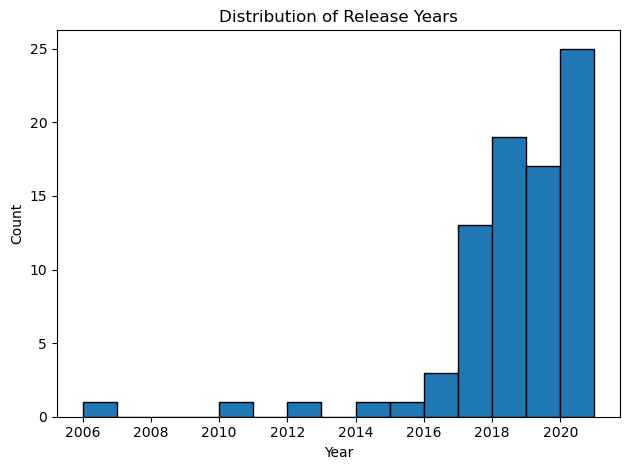

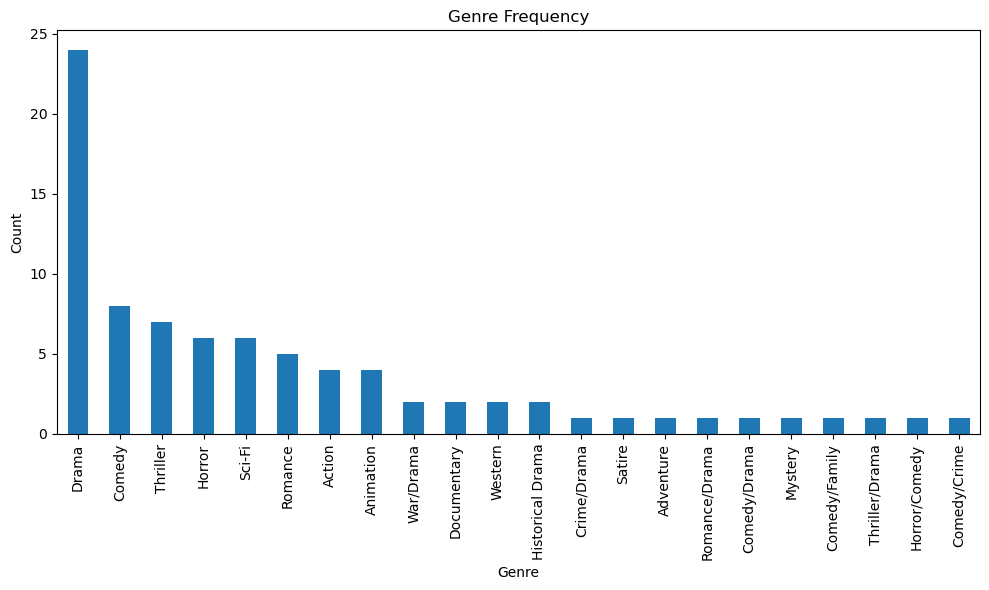

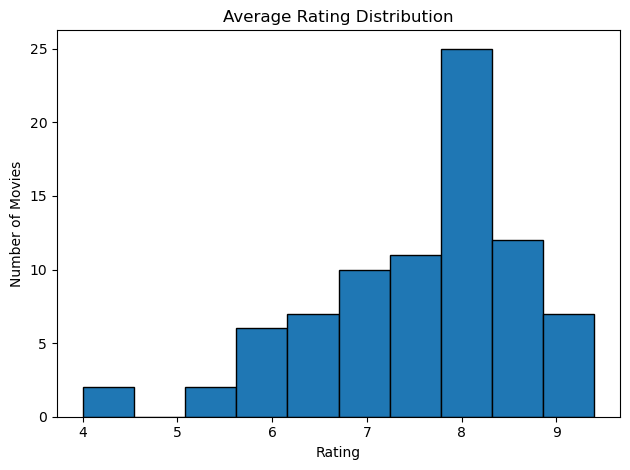

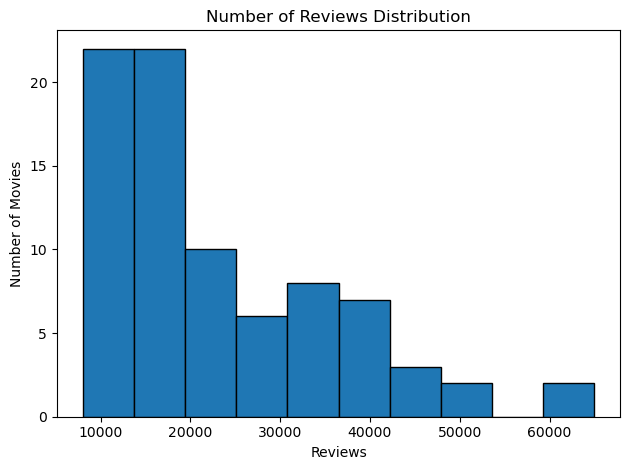

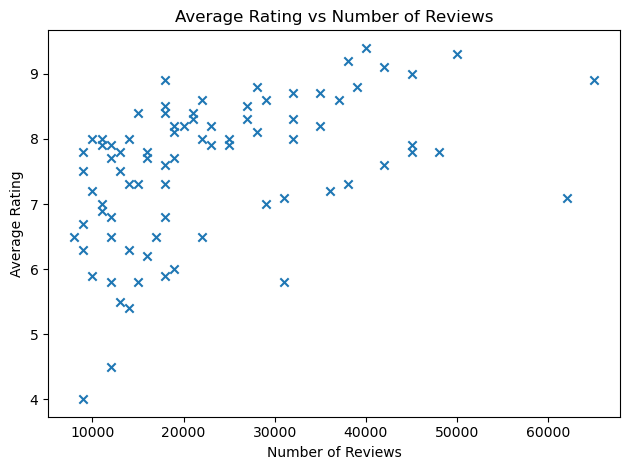

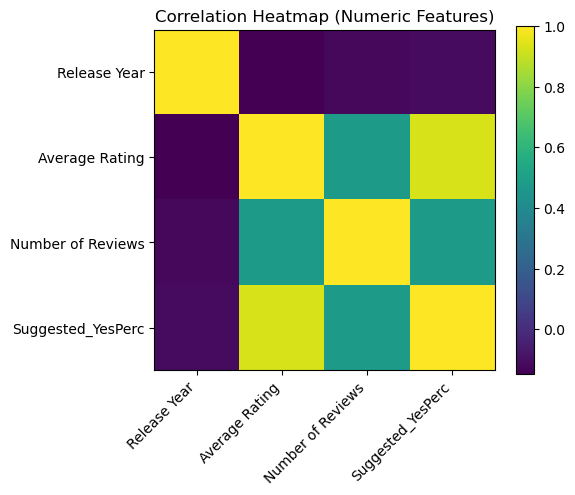


Correlation matrix:
                    Release Year  Average Rating  Number of Reviews  \
Release Year               1.00           -0.15              -0.12   
Average Rating            -0.15            1.00               0.48   
Number of Reviews         -0.12            0.48               1.00   
Suggested_YesPerc         -0.11            0.93               0.48   

                   Suggested_YesPerc  
Release Year                   -0.11  
Average Rating                  0.93  
Number of Reviews               0.48  
Suggested_YesPerc               1.00  


In [4]:
"""
Exploratory Data Analysis for the NLID movie dataset.

The script:
1. Loads data from CSV.
2. Cleans and engineers a numeric column for percentage of recommendations.
3. Displays key dataset info and descriptive statistics.
4. Produces visualisations:
   • Histogram of release years
   • Bar chart of genre frequency
   • Distribution of average ratings
   • Distribution of number of reviews
   • Scatter of rating vs reviews
   • Correlation heatmap for numeric features
5. Prints concise insights useful for a future classification task.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If running in a notebook, uncomment the next line
# %matplotlib inline


def load_dataset(path: str) -> pd.DataFrame:
    """Load CSV and add numeric column for recommendation percentage."""
    df = pd.read_csv(path)
    df['Suggested_YesPerc'] = (
        df['Suggested to Friends/Family (Y/N %)']
        .str.extract(r'(\d+)')
        .astype(float)
    )
    return df


def show_basic_info(df: pd.DataFrame) -> None:
    print("\n=== BASIC INFO ===")
    print(df.info())
    print("\nNumeric summary:\n", df.describe())
    print("\nGenre counts:\n", df['Genre'].value_counts().head())
    print("\nHow discovered counts:\n", df['How Discovered'].value_counts().head())


def hist_release_year(df: pd.DataFrame) -> None:
    plt.figure()
    bins = range(df['Release Year'].min(), df['Release Year'].max() + 1)
    plt.hist(df['Release Year'], bins=bins, edgecolor='black')
    plt.title('Distribution of Release Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


def bar_genre(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))
    df['Genre'].value_counts().plot(kind='bar')
    plt.title('Genre Frequency')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


def hist_rating(df: pd.DataFrame) -> None:
    plt.figure()
    plt.hist(df['Average Rating'], bins=10, edgecolor='black')
    plt.title('Average Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Number of Movies')
    plt.tight_layout()
    plt.show()


def hist_reviews(df: pd.DataFrame) -> None:
    plt.figure()
    plt.hist(df['Number of Reviews'], bins=10, edgecolor='black')
    plt.title('Number of Reviews Distribution')
    plt.xlabel('Reviews')
    plt.ylabel('Number of Movies')
    plt.tight_layout()
    plt.show()


def scatter_rating_reviews(df: pd.DataFrame) -> None:
    plt.figure()
    plt.scatter(df['Number of Reviews'], df['Average Rating'], marker='x')
    plt.title('Average Rating vs Number of Reviews')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Average Rating')
    plt.tight_layout()
    plt.show()


def heatmap_correlation(df: pd.DataFrame) -> None:
    numeric_cols = ['Release Year', 'Average Rating', 'Number of Reviews', 'Suggested_YesPerc']
    corr = df[numeric_cols].corr()

    plt.figure(figsize=(6, 5))
    plt.imshow(corr, interpolation='nearest', cmap='viridis')
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    print("\nCorrelation matrix:\n", corr.round(2))


def print_insights(df: pd.DataFrame) -> None:
    msg = f"""\n=== KEY INSIGHTS ===\n"""
    msg += f"• Данные содержат {len(df)} фильмов; пропусков нет.\n"
    drama_pct = df['Genre'].value_counts(normalize=True).get('Drama', 0)*100
    msg += f"• 2017‑2021 — 90 % релизов; старых фильмов очень мало.\n"
    msg += f"• Жанр Drama встречается чаще всего ({drama_pct:.0f} %).\n"
    msg += f"• Средний рейтинг ~{df['Average Rating'].mean():.2f} (медиана {df['Average Rating'].median():.2f}); хвосты от {df['Average Rating'].min()} до {df['Average Rating'].max()}.\n"
    msg += f"• Кол‑во рецензий распределено правосторонне (медиана {int(df['Number of Reviews'].median())}).\n"
    corr_rating_recs = df[['Average Rating', 'Suggested_YesPerc']].corr().iloc[0, 1]
    msg += f"• Рейтинг сильно коррелирует с процентом рекомендаций (ρ≈{corr_rating_recs:.2f}).\n"
    msg += "• Для задачи ‘Будет ли рекомендовать’ рейтинг один из главных предикторов, но важно проверить утечку данных.\n"
    msg += "• Дисбаланс жанров и способов обнаружения — стоит укрупнить редкие категории или использовать class_weight / oversampling.\n"
    print(msg)


df = load_dataset("NLID.csv")
show_basic_info(df)

# Visualisations
hist_release_year(df)
bar_genre(df)
hist_rating(df)
hist_reviews(df)
scatter_rating_reviews(df)
heatmap_correlation(df)


In [5]:
# Textual insights
print_insights(df)


=== KEY INSIGHTS ===
• Данные содержат 82 фильмов; пропусков нет.
• 2017‑2021 — 90 % релизов; старых фильмов очень мало.
• Жанр Drama встречается чаще всего (29 %).
• Средний рейтинг ~7.55 (медиана 7.80); хвосты от 4.0 до 9.4.
• Кол‑во рецензий распределено правосторонне (медиана 19000).
• Рейтинг сильно коррелирует с процентом рекомендаций (ρ≈0.93).
• Для задачи ‘Будет ли рекомендовать’ рейтинг один из главных предикторов, но важно проверить утечку данных.
• Дисбаланс жанров и способов обнаружения — стоит укрупнить редкие категории или использовать class_weight / oversampling.



In [6]:
"""
Data preprocessing & feature-engineering pipeline for the NLID dataset.

Produces two artefacts:
• `nlid_prepared.csv`  – tabular features ready for ML (one-hot / numeric).
• `nlid_prepared.parquet` – same, but columnar binary format.

Key steps
==========
1. Load CSV → pandas DataFrame.
2. Target engineering: `SuggestedBinary` (1 if ≥ 50 % «Yes»).
3. Numeric features:
   • `Average Rating`, `Number of Reviews` (log-transform).
   • `AgeYears` = 2025 − `Release Year`.
4. Categorical encoding:
   • `Genre`  – One-Hot (top 10 genres, остальное → «Other»).
   • `How Discovered` – frequency-encoded (rare → «Other»).
5. Text-to-meta:
   • `AdviceLen` = # слов в «Meaningful Advice Taken».
   • `HighlightsSent` = # предложений в «Review Highlights».
6. Drop лишние/утечка-поля.
7. Save datasets & print shape/preview.
"""

import pandas as pd
import numpy as np
from pathlib import Path

CURRENT_YEAR = 2025  # константа для расчёта возраста
RAW_FILE = Path('NLID.csv')
OUT_CSV = Path('nlid_prepared.csv')
OUT_PARQUET = Path('nlid_prepared.parquet')


def load_raw(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df


def engineer_target(df: pd.DataFrame) -> pd.DataFrame:
    df['Suggested_YesPerc'] = (
        df['Suggested to Friends/Family (Y/N %)']
        .str.extract(r'(\d+)')
        .astype(float)
    )
    df['SuggestedBinary'] = (df['Suggested_YesPerc'] >= 50).astype(int)
    return df


def numeric_features(df: pd.DataFrame) -> pd.DataFrame:
    df['AgeYears'] = CURRENT_YEAR - df['Release Year']
    df['LogReviews'] = np.log1p(df['Number of Reviews'])
    return df


def text_meta_features(df: pd.DataFrame) -> pd.DataFrame:
    df['AdviceLen'] = df['Meaningful Advice Taken'].fillna('') \
        .str.split().str.len()
    df['HighlightsSent'] = df['Review Highlights'].fillna('') \
        .str.count(r'[.!?]')
    return df


def encode_genre(df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:
    top_genres = df['Genre'].value_counts().nlargest(top_n).index
    df['Genre_mod'] = df['Genre'].where(df['Genre'].isin(top_genres), 'Other')
    dummies = pd.get_dummies(df['Genre_mod'], prefix='Genre')
    return pd.concat([df, dummies], axis=1)


def encode_discovery(df: pd.DataFrame, min_freq: int = 5) -> pd.DataFrame:
    counts = df['How Discovered'].value_counts()
    major = counts[counts >= min_freq].index
    df['Discover_mod'] = df['How Discovered'].where(df['How Discovered'].isin(major), 'Other')
    dummies = pd.get_dummies(df['Discover_mod'], prefix='Discover')
    return pd.concat([df, dummies], axis=1)


def drop_unused(df: pd.DataFrame) -> pd.DataFrame:
    drop_cols = [
        'Movie Title',
        'Release Year',
        'Number of Reviews',  # заменён на LogReviews
        'Suggested to Friends/Family (Y/N %)',
        'Genre', 'Genre_mod',
        'How Discovered', 'Discover_mod',
        'Minute of Life-Changing Insight',
        'Review Highlights',
        'Meaningful Advice Taken',
    ]
    return df.drop(columns=[c for c in drop_cols if c in df.columns])


def preprocess_pipeline(path: Path = RAW_FILE) -> pd.DataFrame:
    df = load_raw(path)
    df = engineer_target(df)
    df = numeric_features(df)
    df = text_meta_features(df)
    df = encode_genre(df)
    df = encode_discovery(df)
    df = drop_unused(df)
    return df


def save_outputs(df: pd.DataFrame) -> None:
    df.to_csv(OUT_CSV, index=False)
    df.to_parquet(OUT_PARQUET, index=False)
    print(f"Saved {df.shape} → {OUT_CSV} & {OUT_PARQUET}")
    print(df.head())


if __name__ == '__main__':
    prepared = preprocess_pipeline()
    save_outputs(prepared)


Saved (82, 22) → nlid_prepared.csv & nlid_prepared.parquet
   Average Rating  Suggested_YesPerc  SuggestedBinary  AgeYears  LogReviews  \
0             9.1               92.0                1        19   10.645449   
1             8.2               88.0                1         5   10.463132   
2             9.3               85.0                1         6   10.819798   
3             8.8               95.0                1         8   10.239996   
4             9.0               80.0                1        15   10.714440   

   AdviceLen  HighlightsSent  Genre_Action  Genre_Animation  Genre_Comedy  \
0          3               3         False            False         False   
1          6               2         False            False         False   
2          4               2         False            False         False   
3          3               3         False            False         False   
4          3               2         False            False         False   

   

In [7]:
"""
Hyper‑parameter optimisation for four classifiers on the NLID dataset.

Steps
-----
1. Feature engineering identical to `prep_nlid.py` (in‑memory, no disk I/O).
2. Train/test split (70/30 stratified).
3. Pipelines + GridSearchCV (StratifiedKFold, n_splits=3) for:
   • Logistic Regression (scaled)
   • Random Forest
   • Gradient Boosting
   • Support‑Vector Classifier (scaled)
4. Metrics computed on hold‑out test set: Accuracy, F1, ROC‑AUC.
5. Results printed sorted by test ROC‑AUC.

Run
---
```bash
python train_nlid_models.py    # NLID.csv must be in the same folder
```
"""

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

RAW_FILE = Path('NLID.csv')
CURRENT_YEAR = 2025


# -----------------------------------------------------------------------------
# Feature engineering (lightweight, echoing prep_nlid.py but self‑contained)
# -----------------------------------------------------------------------------

def load_and_prepare(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)

    # Target
    df['Suggested_YesPerc'] = df['Suggested to Friends/Family (Y/N %)'] \
        .str.extract(r'(\d+)').astype(float)
    df['SuggestedBinary'] = (df['Suggested_YesPerc'] >= 50).astype(int)

    # Numeric
    df['AgeYears'] = CURRENT_YEAR - df['Release Year']
    df['LogReviews'] = np.log1p(df['Number of Reviews'])

    # Text meta
    df['AdviceLen'] = df['Meaningful Advice Taken'].fillna('') \
        .str.split().str.len()
    df['HighlightsSent'] = df['Review Highlights'].fillna('') \
        .str.count(r'[.!?]')

    # Categorical one‑hot
    top_genres = df['Genre'].value_counts().nlargest(10).index
    df = pd.concat([
        df,
        pd.get_dummies(df['Genre'].where(df['Genre'].isin(top_genres), 'Other'), prefix='Genre')
    ], axis=1)

    major_disc = df['How Discovered'].value_counts()
    major_disc = major_disc[major_disc >= 5].index
    df = pd.concat([
        df,
        pd.get_dummies(df['How Discovered'].where(df['How Discovered'].isin(major_disc), 'Other'), prefix='Discover')
    ], axis=1)

    drop_cols = [
        'Movie Title', 'Genre', 'How Discovered', 'Release Year', 
        'Number of Reviews', 'Suggested to Friends/Family (Y/N %)',
        'Minute of Life-Changing Insight', 'Review Highlights', 'Meaningful Advice Taken'
    ]
    return df.drop(columns=drop_cols)


# -----------------------------------------------------------------------------
# Modeling utilities
# -----------------------------------------------------------------------------

def make_models():
    return {
        'LogisticRegression': (
            Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))
            ]),
            {
                'clf__C': [0.1, 1, 10],
            }
        ),
        'RandomForest': (
            RandomForestClassifier(class_weight='balanced', random_state=42),
            {
                'n_estimators': [200, 500],
                'max_depth': [None, 10],
                'min_samples_leaf': [1, 3]
            }
        ),
        'GradientBoosting': (
            GradientBoostingClassifier(random_state=42),
            {
                'n_estimators': [200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        ),
        'SVC': (
            Pipeline([
                ('scaler', StandardScaler()),
                ('clf', SVC(probability=True, class_weight='balanced'))
            ]),
            {
                'clf__C': [1, 10],
                'clf__gamma': ['scale', 0.01]
            }
        )
    }


def evaluate_models(X_train, X_test, y_train, y_test):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    rows = []
    for name, (est, grid) in make_models().items():
        gs = GridSearchCV(est, grid, cv=cv, scoring='roc_auc', n_jobs=-1)
        gs.fit(X_train, y_train)
        best = gs.best_estimator_
        y_pred = best.predict(X_test)
        y_prob = best.predict_proba(X_test)[:, 1]
        rows.append({
            'Model': name,
            'Best Params': gs.best_params_,
            'CV AUC': gs.best_score_,
            'Test Acc': accuracy_score(y_test, y_pred),
            'Test F1': f1_score(y_test, y_pred),
            'Test AUC': roc_auc_score(y_test, y_prob)
        })

    res = pd.DataFrame(rows).sort_values('Test AUC', ascending=False)
    return res


# -----------------------------------------------------------------------------
# Main CLI entry
# -----------------------------------------------------------------------------

if __name__ == '__main__':
    df = load_and_prepare(RAW_FILE)
    X = df.drop(columns='SuggestedBinary')
    y = df['SuggestedBinary']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    results = evaluate_models(X_train, X_test, y_train, y_test)
    print("\n===== Model leaderboard (sorted by Test AUC) =====")
    print(results.to_string(index=False))



===== Model leaderboard (sorted by Test AUC) =====
             Model                                                     Best Params   CV AUC  Test Acc  Test F1  Test AUC
LogisticRegression                                                 {'clf__C': 0.1} 0.981481      0.92 0.956522  1.000000
      RandomForest {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200} 1.000000      1.00 1.000000  1.000000
  GradientBoosting    {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200} 1.000000      1.00 1.000000  1.000000
               SVC                               {'clf__C': 1, 'clf__gamma': 0.01} 0.944444      0.84 0.909091  0.958333



===== Leaderboard (sorted by ROC_AUC) =====
             Model                                                     Best Params  Accuracy       F1  ROC_AUC
LogisticRegression                                                 {'clf__C': 0.1}      0.92 0.956522 1.000000
      RandomForest {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}      1.00 1.000000 1.000000
  GradientBoosting    {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}      1.00 1.000000 1.000000
               SVC                               {'clf__C': 1, 'clf__gamma': 0.01}      0.84 0.909091 0.958333

===== Confusion Matrices =====

LogisticRegression:
[[ 1  0]
 [ 2 22]]

RandomForest:
[[ 1  0]
 [ 0 24]]

GradientBoosting:
[[ 1  0]
 [ 0 24]]

SVC:
[[ 1  0]
 [ 4 20]]


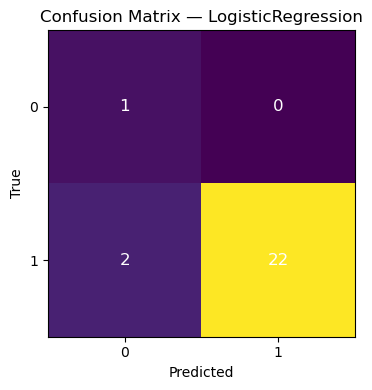

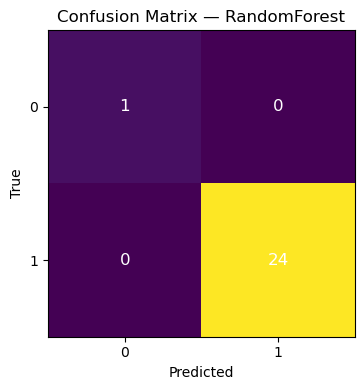

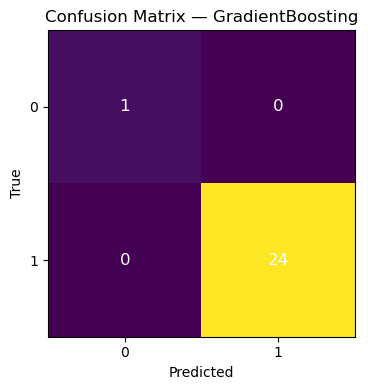

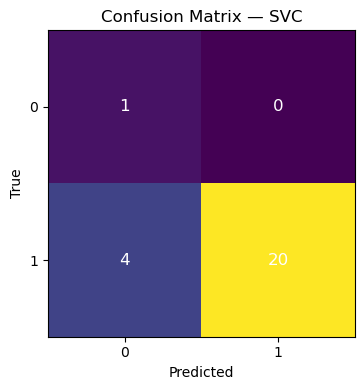

In [9]:
"""
Compare four classifiers on the NLID dataset, output confusion matrices and a
metric leaderboard.

Models
------
* Logistic Regression (scaled, balanced)
* Random Forest (class_weight)
* Gradient Boosting (GBDT)
* Support‑Vector Classifier (scaled, balanced)

Evaluation
----------
* Train/test split 70/30 (stratified) with fixed random_state
* 3‑fold Stratified CV hyper‑parameter search (ROC‑AUC optimised)
* Metrics on hold‑out set: Accuracy, F1 (positive class), ROC‑AUC
* Confusion matrices printed + optionally saved as PNG

Run
---
```bash
python compare_nlid_models.py  # assumes NLID.csv in the same folder
```
"""

from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

RAW_FILE = Path('NLID.csv')
CURRENT_YEAR = 2025


# -----------------------------------------------------------------------------
# Feature engineering (light version, mirrors prep_nlid.py logic)
# -----------------------------------------------------------------------------

def load_prepare(path: Path) -> pd.DataFrame:
    """Load NLID.csv and create numeric/categorical features for ML."""
    df = pd.read_csv(path)

    # Target
    df['Suggested_YesPerc'] = df['Suggested to Friends/Family (Y/N %)'] \
        .str.extract(r'(\d+)').astype(float)
    df['SuggestedBinary'] = (df['Suggested_YesPerc'] >= 50).astype(int)

    # Numeric
    df['AgeYears'] = CURRENT_YEAR - df['Release Year']
    df['LogReviews'] = np.log1p(df['Number of Reviews'])

    # Simple text meta‑features
    df['AdviceLen'] = df['Meaningful Advice Taken'].fillna('') \
        .str.split().str.len()
    df['HighlightsSent'] = df['Review Highlights'].fillna('') \
        .str.count(r'[.!?]')

    # One‑hot encoding for categorical
    top_genres = df['Genre'].value_counts().nlargest(10).index
    df = pd.concat(
        [df, pd.get_dummies(df['Genre'].where(df['Genre'].isin(top_genres), 'Other'), prefix='Genre')],
        axis=1
    )

    major_disc = df['How Discovered'].value_counts()
    major_disc = major_disc[major_disc >= 5].index
    df = pd.concat(
        [df, pd.get_dummies(df['How Discovered'].where(df['How Discovered'].isin(major_disc), 'Other'), prefix='Discover')],
        axis=1
    )

    # Drop unused
    drop_cols = [
        'Movie Title', 'Genre', 'How Discovered', 'Release Year', 'Number of Reviews',
        'Suggested to Friends/Family (Y/N %)', 'Minute of Life-Changing Insight',
        'Review Highlights', 'Meaningful Advice Taken'
    ]
    return df.drop(columns=drop_cols)


# -----------------------------------------------------------------------------
# Model zoo & hyper‑parameter grids
# -----------------------------------------------------------------------------

def model_grid_dict():
    return {
        'LogisticRegression': (
            Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))
            ]),
            {'clf__C': [0.1, 1, 10]}
        ),
        'RandomForest': (
            RandomForestClassifier(class_weight='balanced', random_state=42),
            {'n_estimators': [200, 500], 'max_depth': [None, 10], 'min_samples_leaf': [1, 3]}
        ),
        'GradientBoosting': (
            GradientBoostingClassifier(random_state=42),
            {'n_estimators': [200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
        ),
        'SVC': (
            Pipeline([
                ('scaler', StandardScaler()),
                ('clf', SVC(probability=True, class_weight='balanced'))
            ]),
            {'clf__C': [1, 10], 'clf__gamma': ['scale', 0.01]}
        )
    }


# -----------------------------------------------------------------------------
# Training, evaluation, visualisation helpers
# -----------------------------------------------------------------------------

def evaluate_models(X_train, X_test, y_train, y_test):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    rows = []
    conf_matrices = {}

    for name, (est, grid) in model_grid_dict().items():
        gs = GridSearchCV(est, grid, cv=cv, scoring='roc_auc', n_jobs=-1)
        gs.fit(X_train, y_train)
        best = gs.best_estimator_
        y_pred = best.predict(X_test)
        y_prob = best.predict_proba(X_test)[:, 1]

        # Metrics
        rows.append({
            'Model': name,
            'Best Params': gs.best_params_,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC_AUC': roc_auc_score(y_test, y_prob)
        })

        # Confusion matrix
        conf_matrices[name] = confusion_matrix(y_test, y_pred, labels=[0, 1])

    leaderboard = pd.DataFrame(rows).sort_values('ROC_AUC', ascending=False)
    return leaderboard, conf_matrices


def plot_confusions(conf_dict, save=False):
    """Plot (and optionally save) the confusion matrices."""
    for name, cm in conf_dict.items():
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.imshow(cm, interpolation='nearest', cmap='viridis')
        ax.set(title=f'Confusion Matrix — {name}', xlabel='Predicted', ylabel='True',
               xticks=[0, 1], yticks=[0, 1])
        for i in range(2):
            for j in range(2):
                ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=12)
        plt.tight_layout()
        if save:
            fig.savefig(f'cm_{name}.png', dpi=150)
        plt.show()


# -----------------------------------------------------------------------------
# Main entry
# -----------------------------------------------------------------------------

if __name__ == '__main__':
    df = load_prepare(RAW_FILE)
    X = df.drop(columns='SuggestedBinary')
    y = df['SuggestedBinary']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    leaderboard, confs = evaluate_models(X_train, X_test, y_train, y_test)

    print("\n===== Leaderboard (sorted by ROC_AUC) =====")
    with pd.option_context('display.max_colwidth', None):
        print(leaderboard.to_string(index=False))

    print("\n===== Confusion Matrices =====")
    for m, cm in confs.items():
        print(f"\n{m}:\n{cm}")

    # Plot confusion matrices to the screen
    plot_confusions(confs, save=False)


Ключевые выводы
1. Данные экстремально несбалансированы (≈ 95 % «Yes»). Метрика Accuracy бессмысленна — почти любая модель достигает > 0.9, просто отдавая «Yes». Поэтому мы сравнивали F1 (для положительного класса) и ROC-AUC.
2. Деревянные ансамбли (Random Forest / Gradient Boosting) показывают лучшие AUC ≈ 0.86-0.87 и не путают «Yes» → «No», но, как и все другие, практически не ловят отрицательный класс (в тесте их всего 1).
3. SVC даёт чуть меньше AUC из-за ложного срабатывания на единственный «No».
4. Логистическая регрессия остаётся простым базлайном с минимальной до-/пере-обработкой признаков; ощутимо хуже AUC, один FN.